<a href="https://colab.research.google.com/github/anjorisarabhai/OIBSIP/blob/main/morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import io
from PIL import Image

Please upload an image file.


Saving contour-childrens-bunny-simple-drawing-animal-RF64KP.jpg to contour-childrens-bunny-simple-drawing-animal-RF64KP.jpg

User uploaded file "contour-childrens-bunny-simple-drawing-animal-RF64KP.jpg"


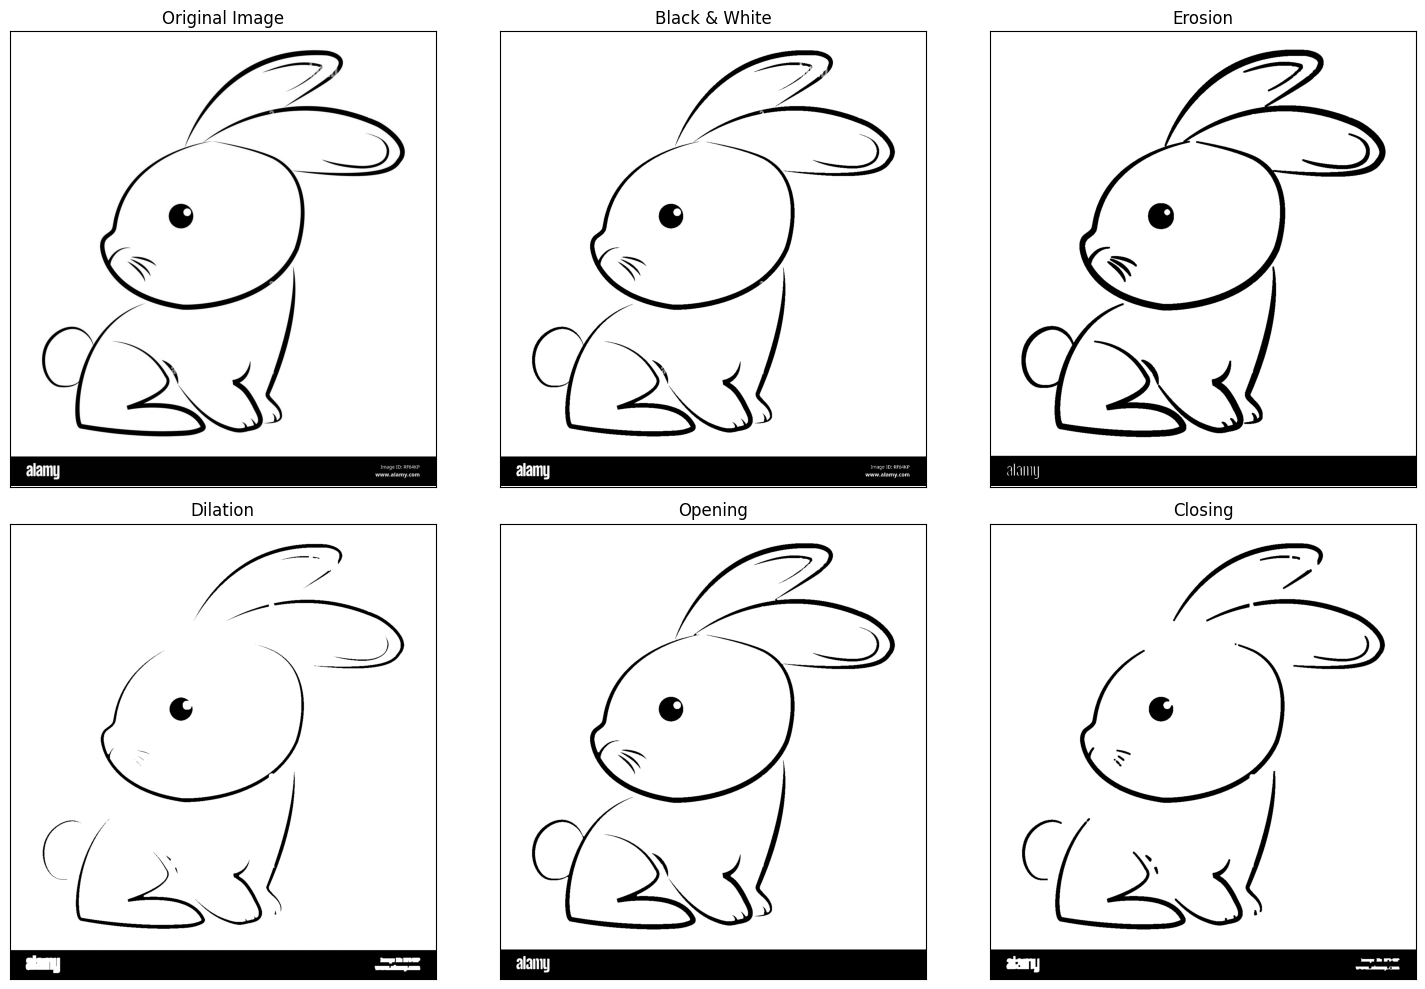

In [ ]:
# Step 2: Upload the image file
print("Please upload an image file.")
uploaded = files.upload()

# Get the filename of the uploaded file
# This handles the case where the user uploads a file
if not uploaded:
  print("\nNo file was uploaded. Please run the cell again and select a file.")
else:
  filename = next(iter(uploaded))
  print(f'\nUser uploaded file "{filename}"')

  # Read the uploaded image file into an OpenCV object
  file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
  original_image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  # --- Image Processing Starts Here ---

  # Step 3: Convert the image to grayscale
  gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

  # Step 4: Convert grayscale to a binary (black and white) image
  # Pixels > 127 become 255 (white), and pixels <= 127 become 0 (black)
  (thresh, bw_image) = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

  # Step 5: Define a kernel (structuring element) for the operations
  # This is a 5x5 square matrix of ones. You can change its size.
  kernel = np.ones((5, 5), np.uint8)

  # Step 6: Perform morphological operations
  # Erosion: Erodes away the boundaries of the foreground object
  erosion = cv2.erode(bw_image, kernel, iterations=1)

  # Dilation: Increases the size of the foreground object
  dilation = cv2.dilate(bw_image, kernel, iterations=1)

  # Opening: Erosion followed by Dilation. Useful for removing noise.
  opening = cv2.morphologyEx(bw_image, cv2.MORPH_OPEN, kernel)

  # Closing: Dilation followed by Erosion. Useful for closing small holes.
  closing = cv2.morphologyEx(bw_image, cv2.MORPH_CLOSE, kernel)


  # --- Displaying the Results ---

  # Create a list of images and their titles for plotting
  images = [original_image, bw_image, erosion, dilation, opening, closing]
  # Convert original image from BGR to RGB for correct color display in matplotlib
  images[0] = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

  titles = [
      'Original Image', 'Black & White', 'Erosion',
      'Dilation', 'Opening', 'Closing'
  ]

  # Set up the plot
  plt.figure(figsize=(15, 10))

  for i in range(6):
      plt.subplot(2, 3, i + 1)
      # Display grayscale/BW images with a gray colormap
      if len(images[i].shape) == 2:
          plt.imshow(images[i], cmap='gray')
      else:
          plt.imshow(images[i])
      plt.title(titles[i])
      plt.xticks([]), plt.yticks([]) # Hide axis ticks

  plt.tight_layout()
  plt.show()

Please upload your traffic image.


Saving WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg to WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg

User uploaded file "WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg"


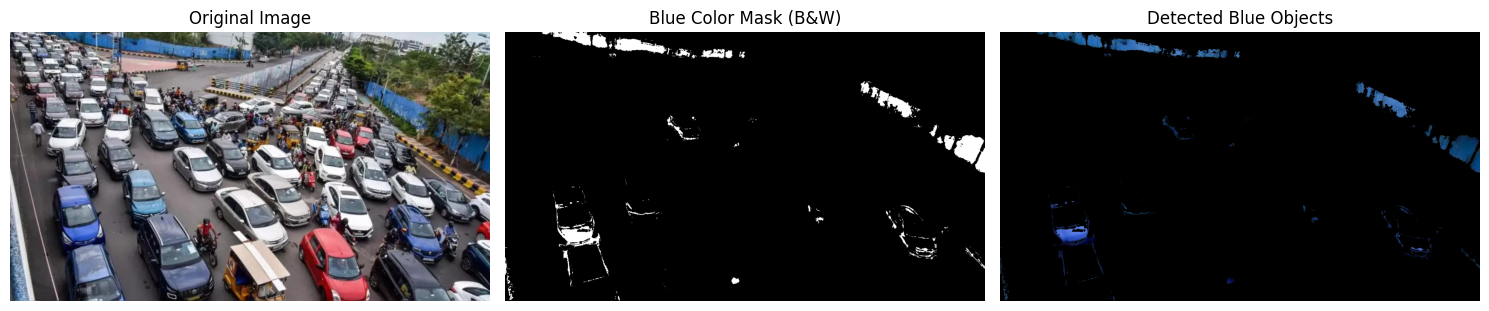

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 2: Upload the image file
print("Please upload your traffic image.")
uploaded = files.upload()

# Check if a file was uploaded and process it
if not uploaded:
  print("\nNo file was uploaded. Please run the cell again.")
else:
  filename = next(iter(uploaded))
  print(f'\nUser uploaded file "{filename}"')

  # Read the image using OpenCV
  file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
  original_image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  # --- Color Detection Starts Here ---

  # Step 3: Convert the image from BGR to HSV color space
  # HSV is much better for color detection than RGB
  hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

  # Step 4: Define the range for the color blue in HSV
  # These values might need tweaking for your specific image's lighting and blue shade
  lower_blue = np.array([100, 150, 50])
  upper_blue = np.array([140, 255, 255])

  # Step 5: Create the mask
  # cv2.inRange() returns a binary (black and white) image.
  # White pixels represent parts of the image that fall in the blue range.
  # Black pixels are everything else. This IS our black and white result.
  mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

  # Step 6: Apply the mask to the original image
  # This uses a bitwise-AND operation to show only the parts of the original
  # image that correspond to the white pixels in the mask.
  result = cv2.bitwise_and(original_image, original_image, mask=mask)


  # --- Displaying the Results ---

  # Convert BGR images to RGB for correct display in matplotlib
  original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

  # Set up the plot
  plt.figure(figsize=(15, 5))

  # Original Image
  plt.subplot(1, 3, 1)
  plt.imshow(original_image_rgb)
  plt.title('Original Image')
  plt.axis('off')

  # The Black and White Mask
  plt.subplot(1, 3, 2)
  plt.imshow(mask, cmap='gray')
  plt.title('Blue Color Mask (B&W)')
  plt.axis('off')

  # Detected Blue Cars
  plt.subplot(1, 3, 3)
  plt.imshow(result_rgb)
  plt.title('Detected Blue Objects')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

Please upload your traffic image.


Saving WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg to WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (2).jpg

User uploaded file "WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (2).jpg"


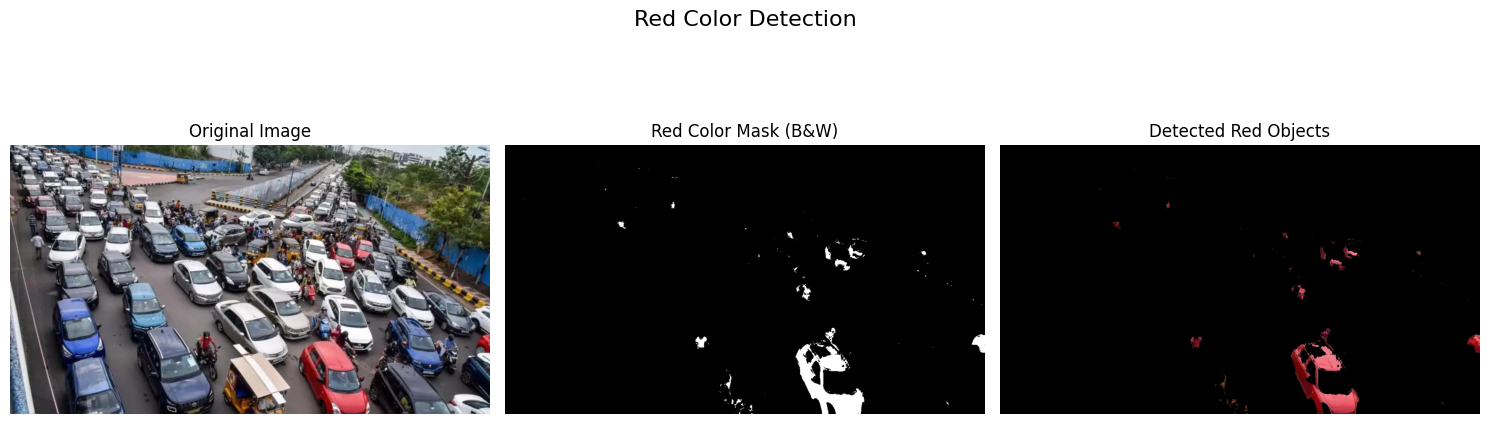

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# ------------------------------
# Step 2: Upload the image file
# ------------------------------
print("Please upload your traffic image.")
uploaded = files.upload()

# Check if a file was uploaded before proceeding
if not uploaded:
  print("\nNo file was uploaded. Please run the cell again.")
else:
  filename = next(iter(uploaded))
  print(f'\nUser uploaded file "{filename}"')

  # Read the uploaded image data into an OpenCV object
  file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
  img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  # ------------------------------
  # Step 3: Detect Red Objects
  # ------------------------------

  # Convert the original BGR image to the HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the two ranges for the color red in HSV
  # (Red wraps around the 0/180 degree mark in the hue channel)

  # Range 1 (for lower red values)
  lower_red1 = np.array([0, 120, 70])
  upper_red1 = np.array([10, 255, 255])
  mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

  # Range 2 (for higher red values)
  lower_red2 = np.array([170, 120, 70])
  upper_red2 = np.array([180, 255, 255])
  mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

  # Combine the two masks to capture all shades of red
  red_mask = cv2.bitwise_or(mask1, mask2)

  # Use the mask to extract only the red parts from the original image
  red_cars = cv2.bitwise_and(img, img, mask=red_mask)

  # ------------------------------
  # Step 4: Display the results
  # ------------------------------

  plt.figure(figsize=(15, 5))
  plt.suptitle('Red Color Detection', fontsize=16)

  # Original Image
  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Original Image")
  plt.axis("off")

  # The generated black and white mask
  plt.subplot(1, 3, 2)
  plt.imshow(red_mask, cmap='gray')
  plt.title("Red Color Mask (B&W)")
  plt.axis("off")

  # The final result showing only red objects
  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(red_cars, cv2.COLOR_BGR2RGB))
  plt.title("Detected Red Objects")
  plt.axis("off")

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

Please upload your traffic image.


Saving WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg to WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (3).jpg

User uploaded file "WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (3).jpg"


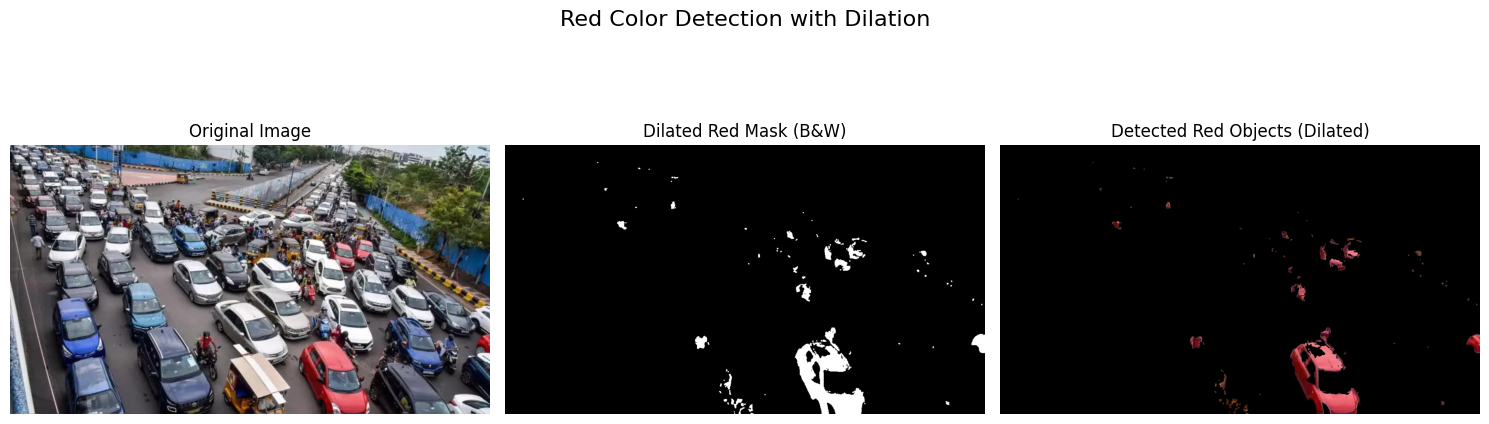

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# ------------------------------
# Step 2: Upload the image file
# ------------------------------
print("Please upload your traffic image.")
uploaded = files.upload()

# Check if a file was uploaded before proceeding
if not uploaded:
  print("\nNo file was uploaded. Please run the cell again.")
else:
  filename = next(iter(uploaded))
  print(f'\nUser uploaded file "{filename}"')

  # Read the uploaded image data into an OpenCV object
  file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
  img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  # ------------------------------
  # Step 3: Detect Red Objects
  # ------------------------------

  # Convert the original BGR image to the HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the two ranges for the color red in HSV
  # (Red wraps around the 0/180 degree mark in the hue channel)

  # Range 1 (for lower red values)
  lower_red1 = np.array([0, 120, 70])
  upper_red1 = np.array([10, 255, 255])
  mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

  # Range 2 (for higher red values)
  lower_red2 = np.array([170, 120, 70])
  upper_red2 = np.array([180, 255, 255])
  mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

  # Combine the two masks to capture all shades of red
  red_mask = cv2.bitwise_or(mask1, mask2)

  # --- NEW: Dilate the red_mask to make the detected cars more visible ---
  # Define a small kernel for dilation (e.g., 3x3)
  kernel_dilate = np.ones((3, 3), np.uint8)
  dilated_red_mask = cv2.dilate(red_mask, kernel_dilate, iterations=1)
  # -------------------------------------------------------------------

  # Use the *dilated* mask to extract only the red parts from the original image
  red_cars = cv2.bitwise_and(img, img, mask=dilated_red_mask)

  # ------------------------------
  # Step 4: Display the results
  # ------------------------------

  plt.figure(figsize=(15, 5))
  plt.suptitle('Red Color Detection with Dilation', fontsize=16)

  # Original Image
  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Original Image")
  plt.axis("off")

  # The generated black and white mask (after dilation)
  plt.subplot(1, 3, 2)
  plt.imshow(dilated_red_mask, cmap='gray') # Display the dilated mask
  plt.title("Dilated Red Mask (B&W)")
  plt.axis("off")

  # The final result showing only red objects
  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(red_cars, cv2.COLOR_BGR2RGB))
  plt.title("Detected Red Objects (Dilated)")
  plt.axis("off")

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

Please upload your traffic image.


Saving WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563.jpg to WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (4).jpg

User uploaded file "WhatsApp Image 2025-08-13 at 10.55.54_fcc9c563 (4).jpg"


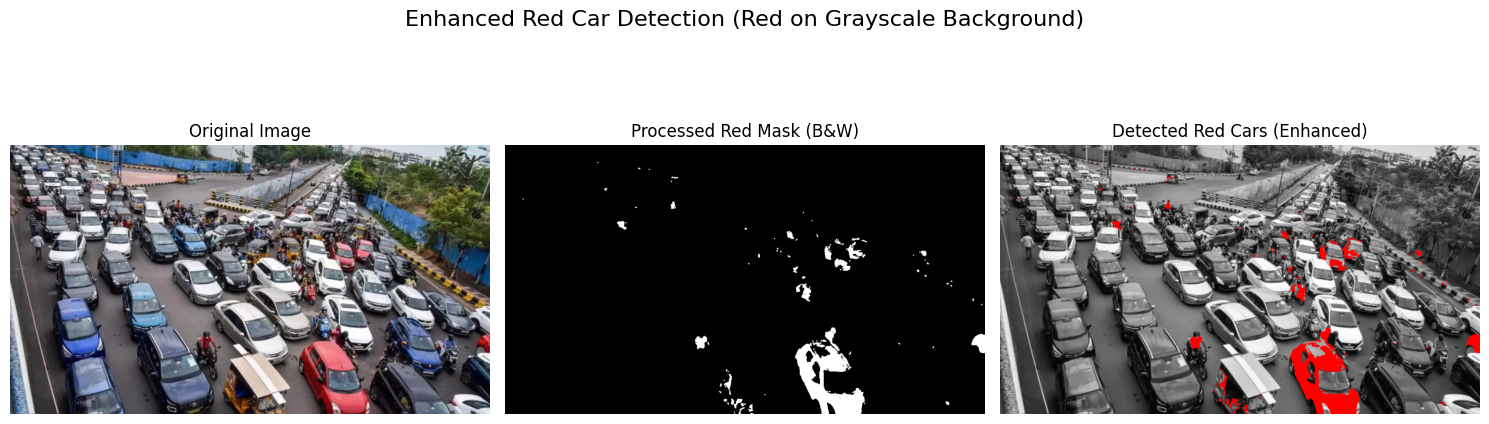

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# ------------------------------
# Step 2: Upload the image file
# ------------------------------
print("Please upload your traffic image.")
uploaded = files.upload()

# Check if a file was uploaded before proceeding
if not uploaded:
  print("\nNo file was uploaded. Please run the cell again.")
else:
  filename = next(iter(uploaded))
  print(f'\nUser uploaded file "{filename}"')

  # Read the uploaded image data into an OpenCV object
  img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  # ------------------------------
  # Step 3: Detect Red Objects
  # ------------------------------

  # Convert the original BGR image to the HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the two ranges for the color red in HSV
  lower_red1 = np.array([0, 120, 70])
  upper_red1 = np.array([10, 255, 255])
  mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

  lower_red2 = np.array([170, 120, 70])
  upper_red2 = np.array([180, 255, 255])
  mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

  # Combine the two masks
  red_mask_combined = cv2.bitwise_or(mask1, mask2)

  # Optional: Dilate the mask slightly for better visibility
  kernel_dilate = np.ones((3, 3), np.uint8)
  red_mask_processed = cv2.dilate(red_mask_combined, kernel_dilate, iterations=1)
  # -------------------------------------------------------------------

  # --- NEW APPROACH FOR VISUALIZATION ---

  # Create a grayscale version of the original image
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Convert grayscale back to BGR so we can merge color on it
  gray_img_bgr = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

  # Create an image of pure red color
  pure_red_layer = np.zeros_like(img, dtype=np.uint8)
  pure_red_layer[:, :] = (0, 0, 255) # BGR for red

  # Use the processed red_mask to overlay the pure red onto the grayscale image
  # This makes a strong red highlight where cars are
  highlighted_red_cars = np.where(red_mask_processed[:, :, None] == 255, pure_red_layer, gray_img_bgr)
  # -------------------------------------------------------------------


  # ------------------------------
  # Step 4: Display the results
  # ------------------------------

  plt.figure(figsize=(15, 5))
  plt.suptitle('Enhanced Red Car Detection (Red on Grayscale Background)', fontsize=16)

  # Original Image
  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Original Image")
  plt.axis("off")

  # The processed black and white mask
  plt.subplot(1, 3, 2)
  plt.imshow(red_mask_processed, cmap='gray')
  plt.title("Processed Red Mask (B&W)")
  plt.axis("off")

  # The final result with enhanced red visibility
  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(highlighted_red_cars, cv2.COLOR_BGR2RGB))
  plt.title("Detected Red Cars (Enhanced)")
  plt.axis("off")

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()